In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [2]:
df = pd.read_csv('edited customer_churn_large_dataset - customer_churn_large_dataset.csv')

In [3]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
df['Location'].replace({'Los Angeles': 0, 'New York': 1, 'Miami': 2, 'Chicago': 3, 'Houston': 4}, inplace=True)


In [8]:
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)


In [9]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,0,0,17,73.36,236,0
1,62,1,1,1,48.76,172,0
2,24,1,0,5,85.47,460,0
3,36,1,2,3,97.94,297,1
4,46,1,2,19,58.14,266,0


In [10]:
nan_check = df.isna()

any_nan = nan_check.any().any()

if any_nan:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")

No NaN values found in the DataFrame.


In [11]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00"
mean,44.03,0.50,2.00,12.49,65.05,274.39,0.50
std,15.28,0.50,1.42,6.93,20.23,130.46,0.50
min,18.00,0.00,0.00,1.00,30.00,50.00,0.00
25%,31.00,0.00,1.00,6.00,47.54,161.00,0.00
50%,44.00,1.00,2.00,12.00,65.01,274.00,0.00
75%,57.00,1.00,3.00,19.00,82.64,387.00,1.00
max,70.00,1.00,4.00,24.00,100.00,500.00,1.00


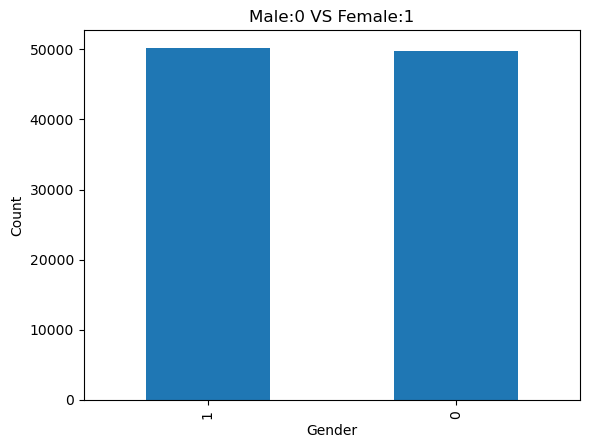

In [12]:
gender_counts = df['Gender'].value_counts()

# Creating a bar plot
gender_counts.plot(kind='bar')

plt.title('Male:0 VS Female:1')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

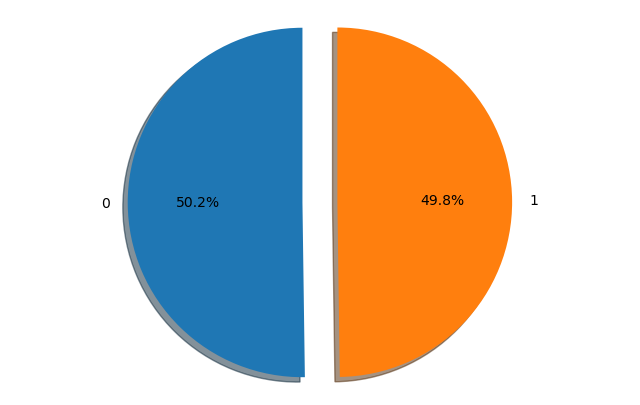

In [13]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

# Using the unique labels as labels for the pie chart
labels = df['Churn'].value_counts().index.tolist()

# Calculating the explode values for each slice (e.g., 0.1 for all slices)
explode = [0.1] * len(labels)

# Plotting the data from df['churn'].value_counts()
patches, texts, autotexts = ax.pie(df['Churn'].value_counts(), autopct='%1.1f%%', shadow=True, 
                                   startangle=90, explode=explode, labels=labels)

# Setting the aspect ratio to be equal so that it's a circle
ax.axis('equal')

plt.show()

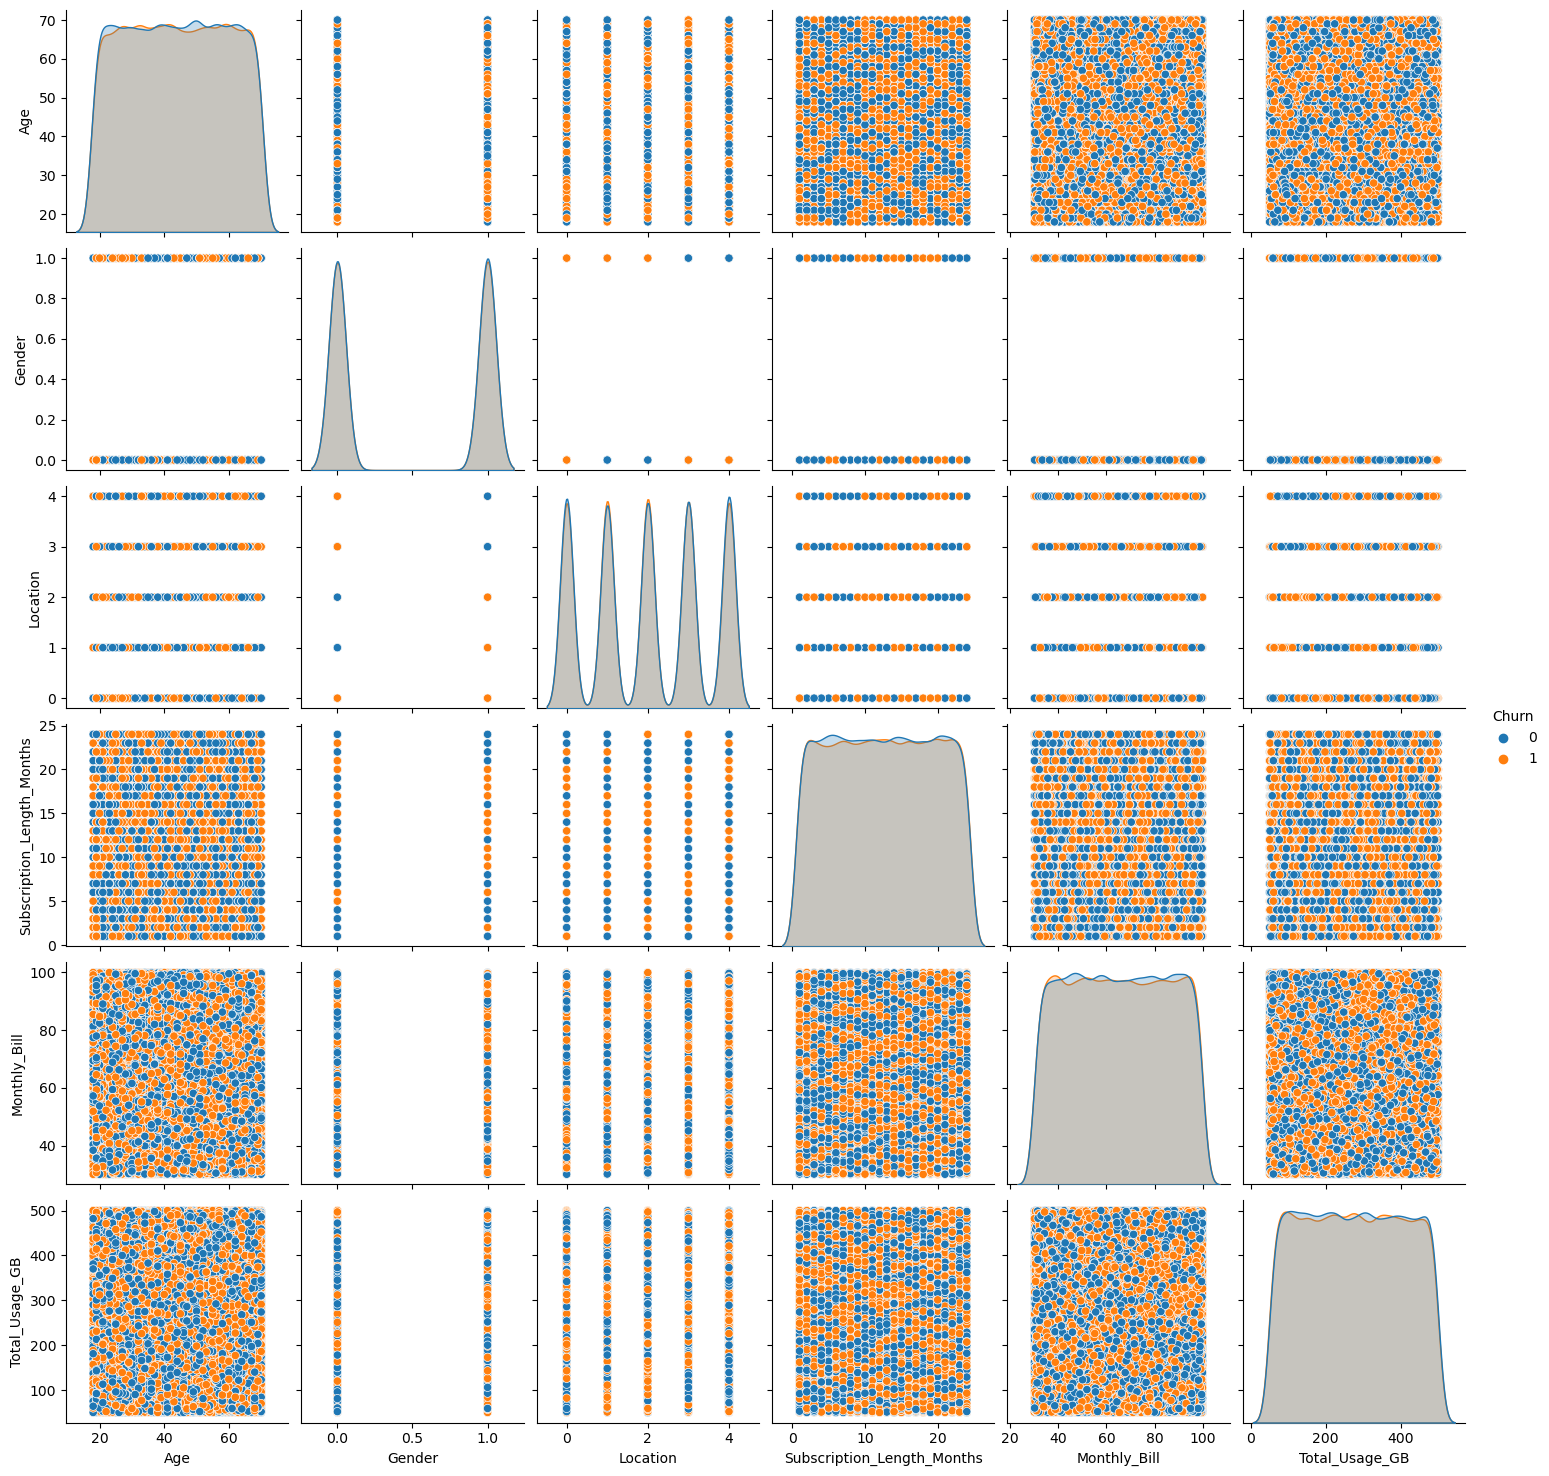

In [14]:
sns.pairplot(df, hue= 'Churn', data = df)

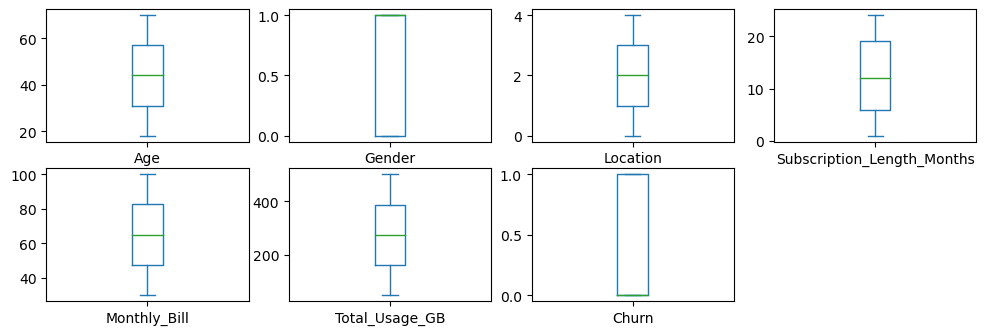

In [15]:
# Creating subplots of box plots 
df.plot.box(subplots=True, layout=(5, 4), sharex=True, figsize=(12, 10)) 
# Displaying the plots 
plt.show()

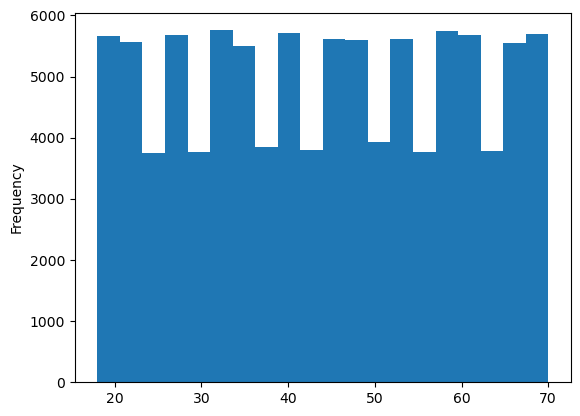

In [17]:
df['Age'].plot.hist(bins=20)
plt.show()

In [18]:
df_1 = df.copy()

In [19]:
df_1.rename(columns={'Subscription_Length_Months': 'Tenure'}, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


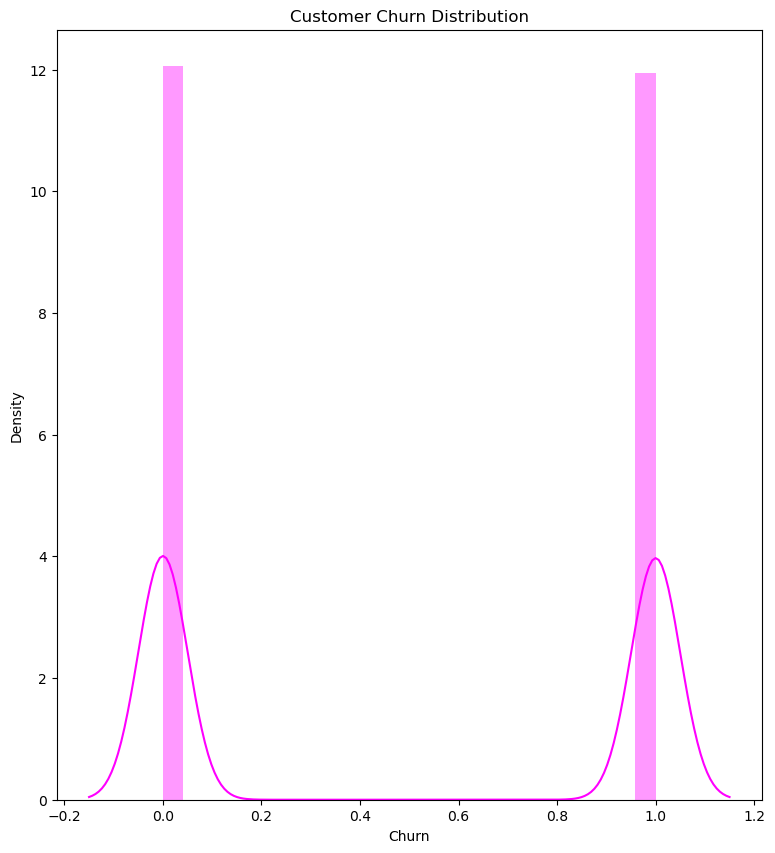

In [20]:
plt.figure(figsize= (20,10))
plt.subplot(1,2,1)
sns.distplot(df_1["Churn"],kde = True, color='magenta')
plt.title("Customer Churn Distribution")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


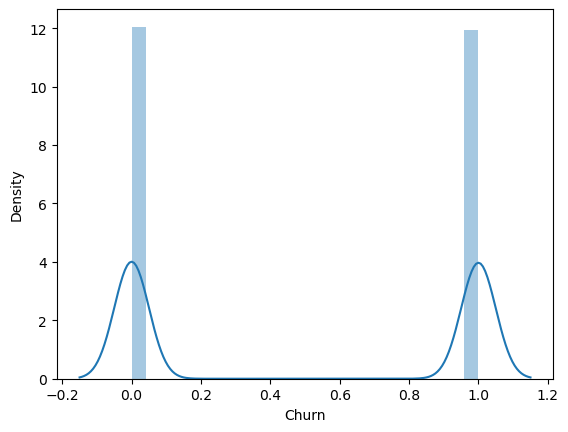

In [21]:
try:
    sns.distplot(df_1["Churn"])
except ValueError as e:
    print("Error:", e)

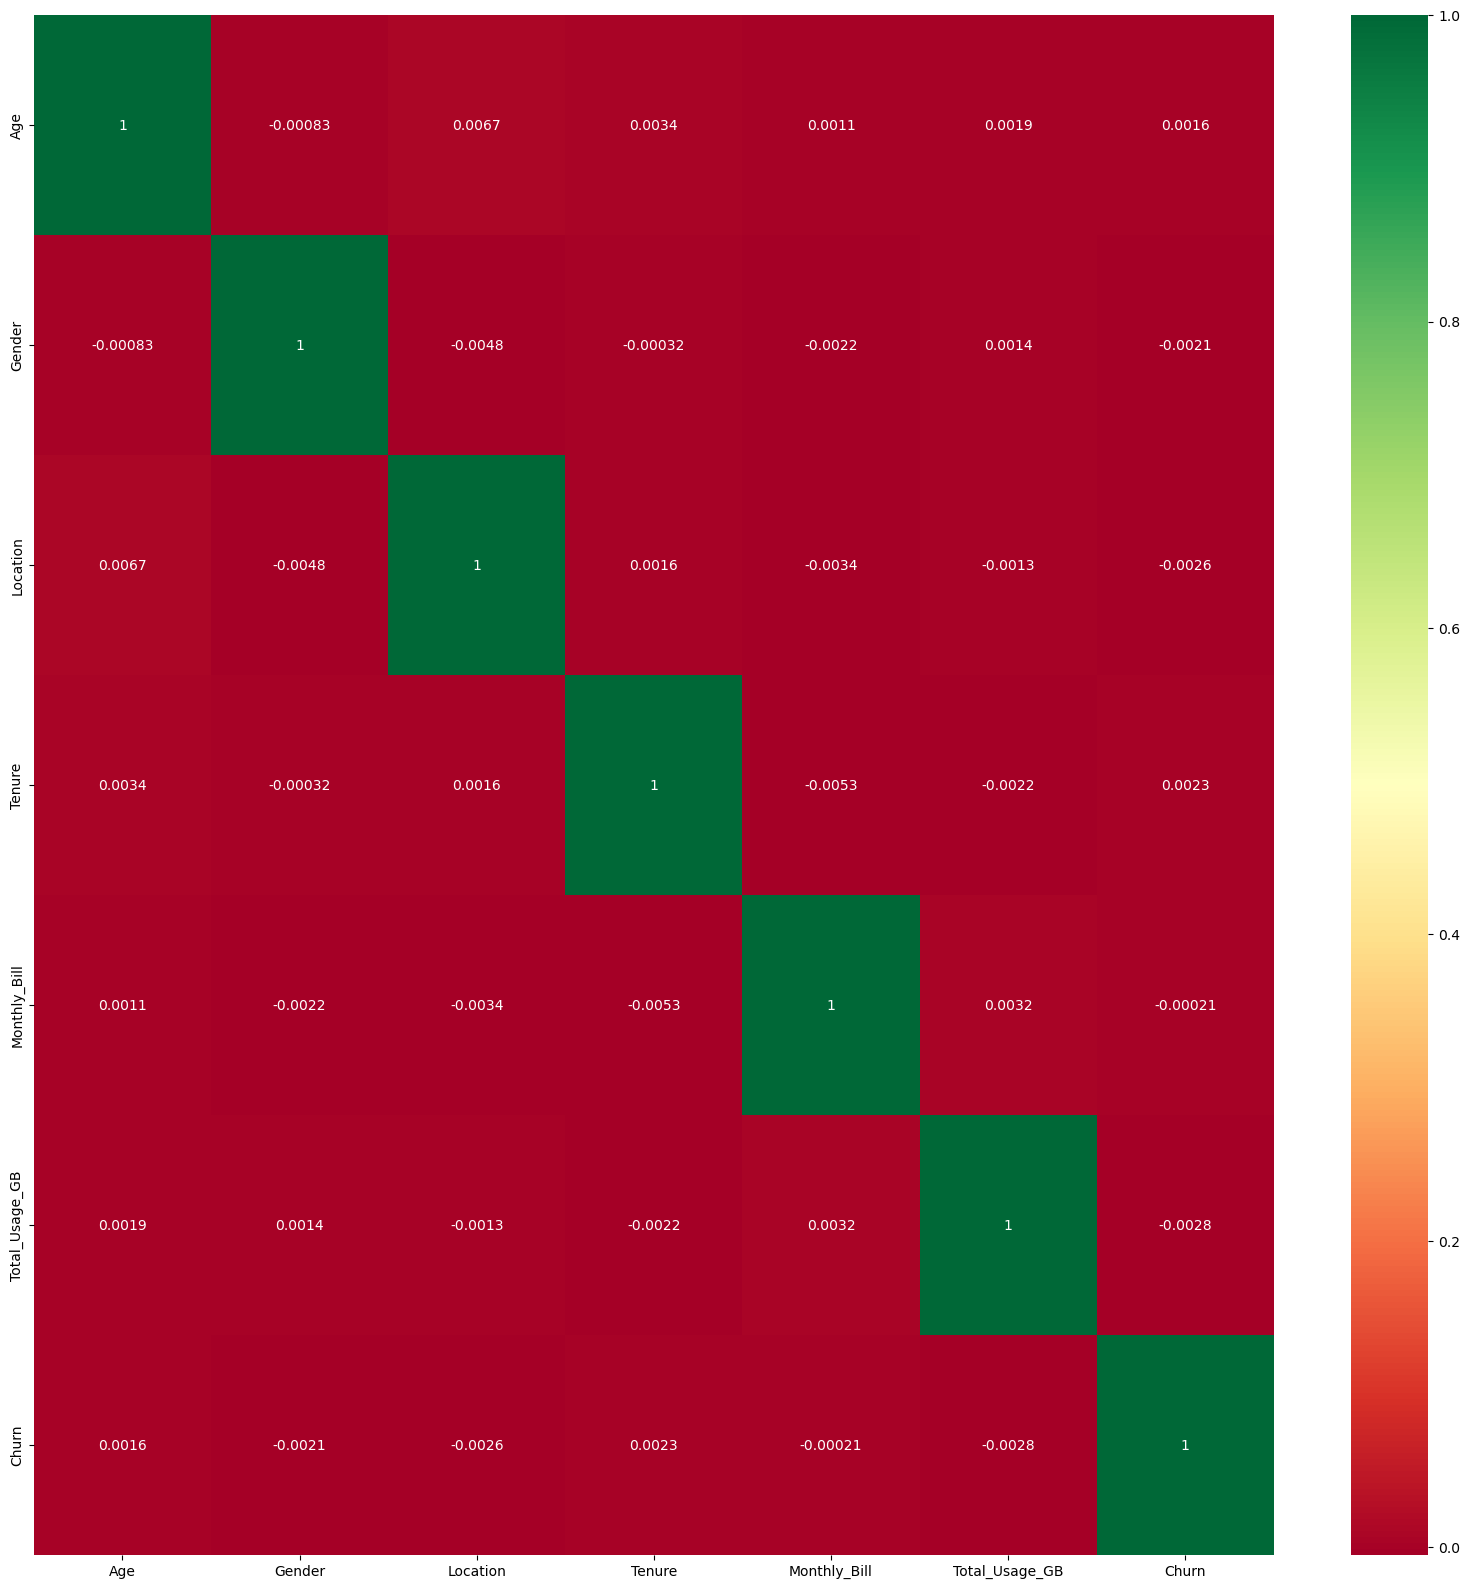

In [22]:
relation= df_1.corr()
top_corr_features = relation.index
plt.figure(figsize=(20,20))
#plotting heat map
g=sns.heatmap(df_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
# Separate the target variable ('Churn') from the features
X = df_1.drop(columns=['Churn'])
y = df_1['Churn']


In [24]:
x= df_1.iloc[:,0:-1] ## Independent Features
y= df_1.iloc[:,-1] ## Dependent Variables

In [25]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [26]:
# Split data into training and testing datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# Creating and fit logistic regression model
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(x_train, y_train)

# Making predictions using the test data
prediction = lreg.predict(x_test)

# Calculate and print metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.49746666666666667
MSE: 0.49746666666666667
RMSE: 0.7053131692139788


In [27]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.50      0.73      0.60     15037
           1       0.50      0.27      0.35     14963

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.47     30000
weighted avg       0.50      0.50      0.47     30000



  Using cached protobuf-3.19.6-cp39-cp39-macosx_10_9_x86_64.whl (980 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.26.0 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.


2023-09-05 22:05:42.440369: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Text(95.72222222222221, 0.5, 'Truth')

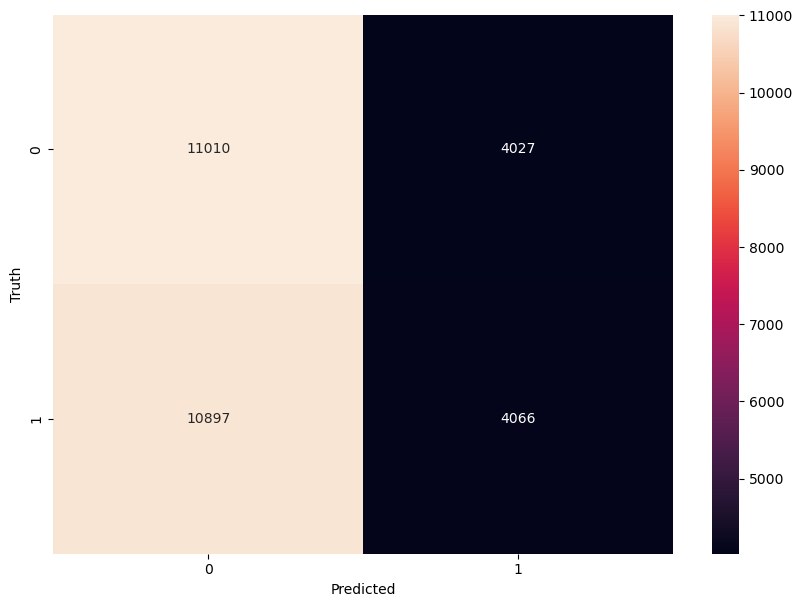

In [28]:
!pip install tensorflow
import tensorflow as tf

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("Accuracy score is: ", accuracy_score(y_test,prediction)*100,"%")

Accuracy score is:  50.25333333333334 %


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Fit the model on your training data
tree.fit(x_train, y_train)

# Use the trained model to make predictions on the test data
test_predict = tree.predict(x_test)

# Calculate and print accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, test_predict)
precision = precision_score(y_test, test_predict, average='macro')
recall = recall_score(y_test, test_predict, average='macro')

print('Test accuracy score:', accuracy)
print('Test precision score:', precision)
print('Test recall score:', recall)


Test accuracy score: 0.5030333333333333
Test precision score: 0.5030308787901818
Test recall score: 0.5030308851079187


# XGBoost

In [34]:
!pip install xgboost


In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Create an instance of XGBRegressor with your desired hyperparameters
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

# Fit the model on your training data
xgb_reg.fit(x_train, y_train)

# Use the trained model to make predictions on the test data
xgb_y_pred = xgb_reg.predict(x_test)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, xgb_y_pred)
print('Mean Absolute Error (MAE):', mae)


Mean Absolute Error (MAE): 0.5002704283928499


In [37]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Calculating R-squared (R2) score
r2 = r2_score(y_test, xgb_y_pred)
print('R-squared (R2) Score:', r2)

# Calculating Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, xgb_y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

R-squared (R2) Score: -0.1240742679433744
Root Mean Squared Error (RMSE): 0.5301102311255508


In [39]:
df_1['Churn'].replace(0,'no',inplace=True)
df_1['Churn'].replace(1,'yes',inplace=True)
df_1.to_csv('Customer.h5', header=True, index=False)

In [40]:
df_1['Churn'].replace(0,'no',inplace=True)
df_1['Churn'].replace(1,'yes',inplace=True)
df_1.to_csv('Customercsv.csv', header=True, index=False)